Import library

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



Read the data, find the dependent variable, and determine the data type

In [35]:
house_data = pd.read_csv(r'House data.csv')

house_data

# Dependent variable is price(AZN) 
# The dependent variable is continuous, so it is regression data

,Location,sq.m,number_of_rooms,floor,price (AZN)
0,Shah Ismail Khatai m,108.0,2,3.0,210 000
1,8-ci mikrorayon,65.0,2,7.0,134 000
2,Yeni Gunesli,98.2,3,13.0,122 800
3,Nasimi r,248.0,5,15.0,1 000 000
4,Baku White City,126.1,3,NaN,453 960
...,...,...,...,...,...
3195,Narimanov r,86.0,2,7.0,118 000
3196,Nariman Narimanov m,85.0,3,9.0,200 000
3197,Qara Qarayev m,123.0,3,9.0,195 000
3198,Qara Qarayev m,70.0,2,8.0,124 000


See descriptive statistics for both numeric and categorical variables
What is the problem with the price (AZN) variable?


In [36]:
house_data.describe(include = 'all')

# price (AZN) is object
# There is a null
# There are too many uniques in the Location column


,Location,sq.m,number_of_rooms,floor,price (AZN)
count,2986,3200.000000,3200.000000,2783.000000,3200
unique,76,NaN,NaN,NaN,631
top,Nasimi r,NaN,NaN,NaN,135 000
freq,210,NaN,NaN,NaN,44
mean,NaN,115.537625,2.852813,8.246497,NaN
std,NaN,73.159192,0.988473,5.053591,NaN
min,NaN,7.000000,1.000000,1.000000,NaN
25%,NaN,70.000000,2.000000,4.000000,NaN
50%,NaN,100.000000,3.000000,7.000000,NaN
75%,NaN,140.000000,3.000000,12.000000,NaN


In [38]:
house_data.drop('Location', axis = 1, inplace = True)

In [39]:
house_data.dtypes

sq.m               float64
number_of_rooms      int64
floor              float64
price (AZN)         object
dtype: object

In [40]:
house_data['price (AZN)'] = house_data['price (AZN)'].str.replace(' ', '')

In [41]:
house_data

,sq.m,number_of_rooms,floor,price (AZN)
0,108.0,2,3.0,210000
1,65.0,2,7.0,134000
2,98.2,3,13.0,122800
3,248.0,5,15.0,1000000
4,126.1,3,NaN,453960
...,...,...,...,...
3195,86.0,2,7.0,118000
3196,85.0,3,9.0,200000
3197,123.0,3,9.0,195000
3198,70.0,2,8.0,124000


As you can see, the Price column type is object (categorical). You need to convert it to a numeric value

In [42]:
house_data['price (AZN)'] = house_data['price (AZN)'].astype(int)


In [43]:
house_data.dtypes

sq.m               float64
number_of_rooms      int64
floor              float64
price (AZN)          int64
dtype: object

In [44]:
# Duplicate check

house_data.duplicated().sum()

# If there is a duplicate, delete it

house_data.drop_duplicates(inplace = True)

Check for missing values, fill

In [45]:
house_data.isnull().sum()

sq.m                0
number_of_rooms     0
floor              88
price (AZN)         0
dtype: int64

In [46]:
# If there is null, fill null for Linear Regression
# Mean method for non objects
# Mode method for objects

for rec in house_data.columns:
    if house_data[rec].dtypes != object and rec != 'price (AZN)':
        house_data[rec].fillna(value = house_data[rec].mean(), inplace = True)
    else:
        house_data[rec].fillna(value = house_data[rec].mode()[0], inplace = True)

house_data.isnull().sum()

sq.m               0
number_of_rooms    0
floor              0
price (AZN)        0
dtype: int64

Check the correlation in both table and heatmap form

In [47]:
house_data_corr = house_data.corr()

house_data_corr


,sq.m,number_of_rooms,floor,price (AZN)
sq.m,1.000000,0.792580,0.200835,0.684824
number_of_rooms,0.792580,1.000000,0.122659,0.513993
floor,0.200835,0.122659,1.000000,0.114054
price (AZN),0.684824,0.513993,0.114054,1.000000


<Axes: >

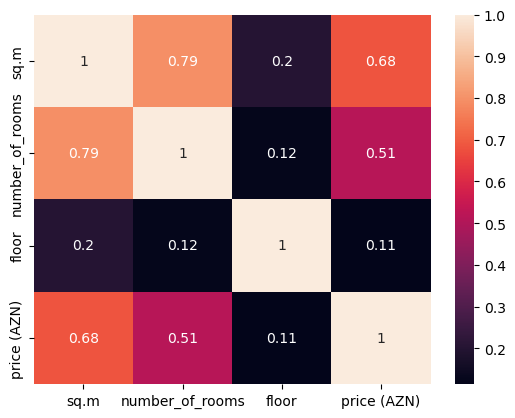

In [48]:
sns.heatmap(house_data.corr(), annot = True)

Outlier Treatment

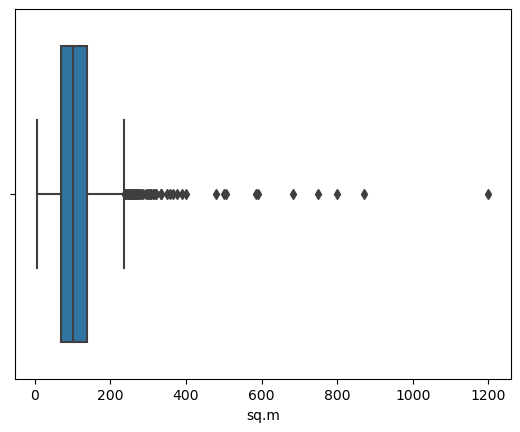

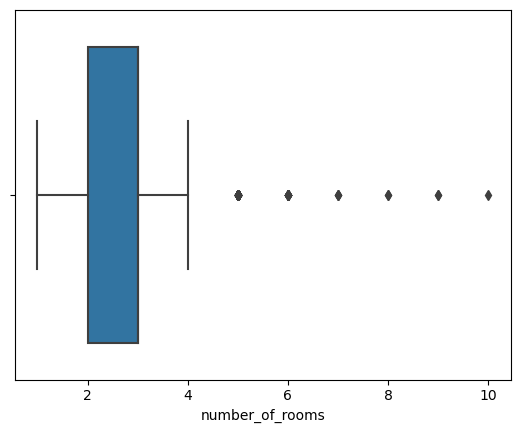

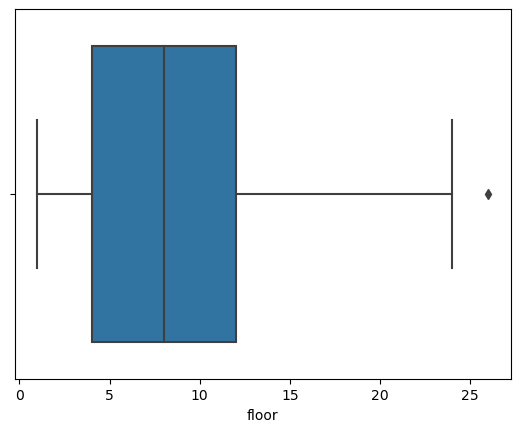

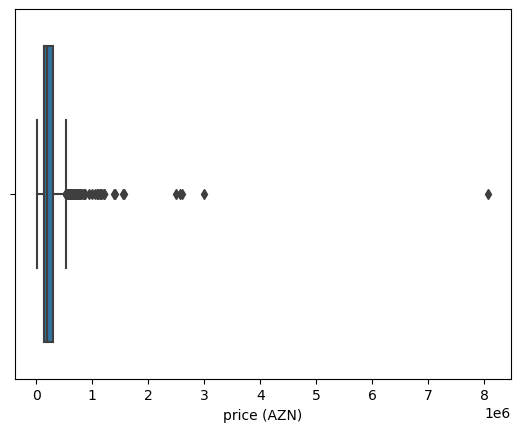

In [49]:
# outlier treatment for Linear Regression model

for rec in house_data.columns:
    if house_data[rec].dtypes != object:
        sns.boxplot(x = house_data[rec], data = house_data)
        plt.show()
    

In [50]:
# outlier treatment for Linear Regression

for rec in house_data.columns:
    if house_data[rec].dtype != object and rec != 'price (AZN)':
        q1 = house_data[rec].quantile(0.25)
        q3 = house_data[rec].quantile(0.75)
        IQR = q3 - q1
        lower = q1 - 1.5 * IQR
        upper = q3 + 1.5 * IQR
        house_data[rec] = np.where(house_data[rec] > upper,
                                    upper,
                                    np.where(house_data[rec] < lower,
                                             lower,
                                             house_data[rec]))



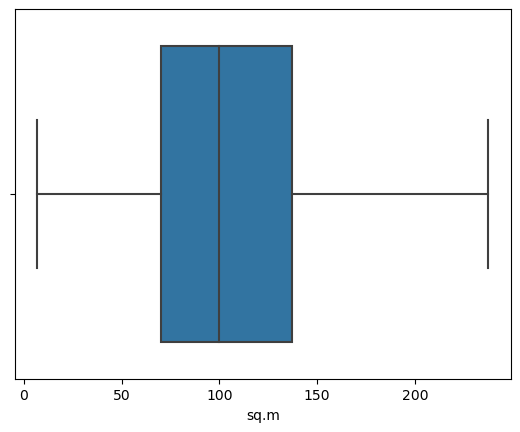

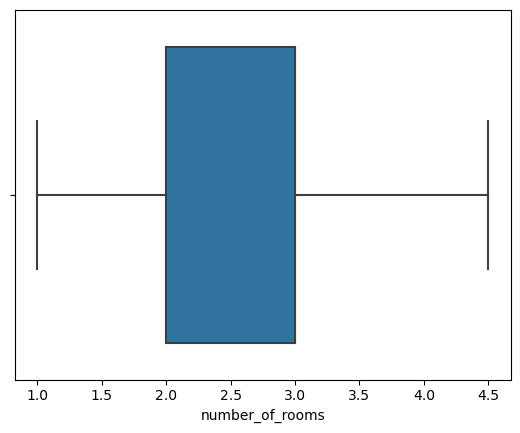

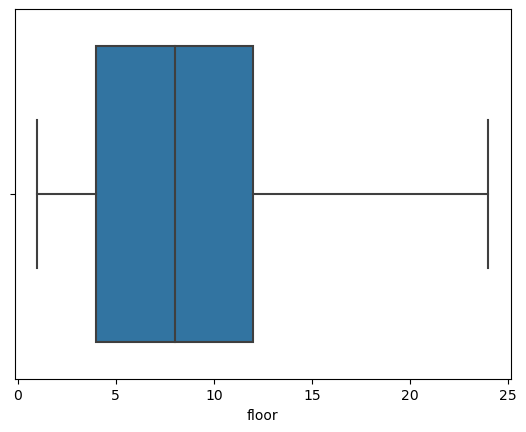

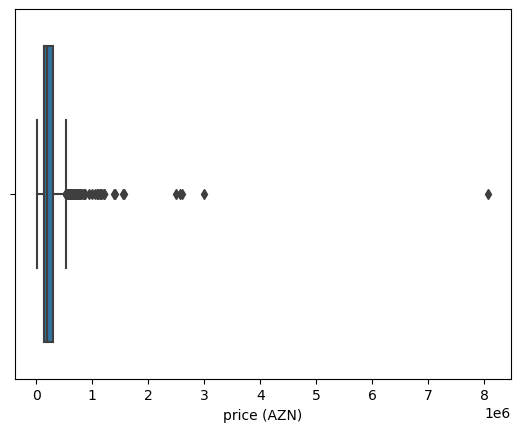

In [51]:
# outlier treatment for Linear Regression

for rec in house_data.columns:
    if house_data[rec].dtypes != object:
        sns.boxplot(x = house_data[rec], data = house_data)
        plt.show()

In [52]:
# convert categorical to numeric with get_dummies

house_data = pd.get_dummies(house_data, drop_first = True)

house_data

,sq.m,number_of_rooms,floor,price (AZN)
0,108.0,2.0,3.000000,210000
1,65.0,2.0,7.000000,134000
2,98.2,3.0,13.000000,122800
3,237.5,4.5,15.000000,1000000
4,126.1,3.0,8.282128,453960
...,...,...,...,...
3195,86.0,2.0,7.000000,118000
3196,85.0,3.0,9.000000,200000
3197,123.0,3.0,9.000000,195000
3198,70.0,2.0,8.000000,124000


Data train test split

In [53]:
# inputs, outputs

inputs = house_data.drop('price (AZN)', axis = 1)

outputs = house_data['price (AZN)']


X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.2, random_state = 42)


Linear regression is applied

In [54]:
reg = LinearRegression()

reg.fit(X_train, y_train)


LinearRegression()

In [55]:
reg.coef_

array([  3190.88886382, -22291.26465023,   -518.84941728])

In [56]:
reg.intercept_

-34442.904233806476

In [57]:
fy_predict = reg.predict(X_test)

In [58]:
fy_predict

array([328370.64220022, 277439.17013575, 350310.76458634, 260017.03110283,
       463593.38046843, 621007.11232846,  63008.01708583, 341775.79682944,
       315729.83650159, 611411.96703874, 116812.07071363, 332721.97965526,
        92841.50805491, 513013.26167758, 499273.38226606, 111390.19946042,
       114781.63044103, 411579.25217287, 289242.8191166 , 198296.42528126,
       309866.90819123, 402999.32701945, 110352.50062586, 274883.81922941,
        94916.90572404, 124231.54727584, 342858.45306052, 107758.25353945,
       208322.27136277, 308310.35993939, 337106.15207391, 255025.15572887,
       123271.64080141, 429486.34440444, 257333.93047839,  95591.33986158,
       178599.40771744,  88016.27857911, 187056.58311421, 273807.22421478,
       328415.59959674, 108795.95237401, 339700.39916032,  31099.12844762,
       246567.9803321 , 235990.44986969, 421592.97582148, 617894.01582477,
       289242.8191166 ,  82231.14262889, 112109.59099449, 182705.24565917,
       116812.07071363,  

In [59]:
# function for metrics

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae_test = metrics.mean_absolute_error(y_test, y_pred)
    mse_test = metrics.mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = metrics.r2_score(y_test, y_pred)


    y_pred_train = model.predict(X_train)

    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    mse_train = metrics.mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)


    results_dict = {
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
        'Train': [mae_train, mse_train, rmse_train, r2_train * 100],
        'Test': [mae_test, mse_test, rmse_test, r2_test * 100]
    }

    results_df = pd.DataFrame(results_dict)
    
    print(results_df)
    
    return r2_test

In [60]:
train_and_evaluate_model(reg, X_train, y_train, X_test, y_test)

  Metric         Train          Test
0    MAE  6.886304e+04  6.541591e+04
1    MSE  4.469052e+10  1.603872e+10
2   RMSE  2.114013e+05  1.266441e+05
3     R2  3.108639e+01  5.311518e+01


0.5311517981655933